The data set comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench.

*   
According to the Dataset Given, the most interesting target features can be  rotor temperature ("pm"), stator temperatures, torque and Motor speed because they are not reliably and economically measurable in a commercial vehicle.
*   Being able to have strong estimators for the rotor and stator temperature helps the automotive industry to manufacture motors with less material and enables control strategies to utilize the motor to its maximum capability.

*   A more accurate and appropriate torque estimate leads to more accurate and adequate motor control, decreasing power losses and, eventually, heat build-up.









In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Target feature variables are as following :**  

1.   Stator winding temperature (stator_winding)
2.   Stator tooth temperature (stator_tooth)
3.   Stator yoke temperature (stator_yoke)
4.   Rotor temperature (pm)

**These are the outputs of the model which accepts the following as the input features:**

1.   Voltage q-component (u_q)
2.   Voltage d-component (u_d)
3.   Current d-component (i_q)
4.   Current q-component (i_d)
5.   Coolant temperature (coolant)
6.   Ambient temperature (ambient)
7.   Torque (torque)







In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split

# data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# model selection and building libraries
from sklearn.model_selection import train_test_split 

RANDOM_STATE = 42

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
import sklearn
import numpy as np
import pandas as pd
from math import sqrt
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

**Load the dataset**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DL_Project/measures_v2.csv')

In [ ]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


**Discription of dataset**

In [ ]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [ ]:
df.shape

(1330816, 13)

**Let's rearrange the columns and rename them for better understanding**

In [ ]:
new_columns = [
    'u_q', 
    'u_d', 
    'i_q',
    'i_d',
    'coolant',
    'ambient',
    'torque',
    'motor_speed',
    'profile_id',
    'stator_winding',  
    'stator_tooth',  
    'stator_yoke',
    'pm'
    ]

df = df[new_columns]
print('Dataframe with columns in new order:')
df.head(1)

Dataframe with columns in new order:


,u_q,u_d,i_q,i_d,coolant,ambient,torque,motor_speed,profile_id,stator_winding,stator_tooth,stator_yoke,pm
0,-0.450682,-0.350055,0.000328,0.004419,18.805172,19.850691,0.187101,0.002866,17,19.08667,18.293219,18.316547,24.554214


**Data Exploratory analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   u_d             1330816 non-null  float64
 2   i_q             1330816 non-null  float64
 3   i_d             1330816 non-null  float64
 4   coolant         1330816 non-null  float64
 5   ambient         1330816 non-null  float64
 6   torque          1330816 non-null  float64
 7   motor_speed     1330816 non-null  float64
 8   profile_id      1330816 non-null  int64  
 9   stator_winding  1330816 non-null  float64
 10  stator_tooth    1330816 non-null  float64
 11  stator_yoke     1330816 non-null  float64
 12  pm              1330816 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [ ]:
# check duplicates and drop if exist
duplicate_r = df[df.duplicated().values == True]
print(f'Number of duplicates: {len(duplicate_r)}')

Number of duplicates: 0


**Visualization of data**

**Sample size plot**

The data set consists of multiple measurement sessions, which can be distinguished from each other by column "profile_id".

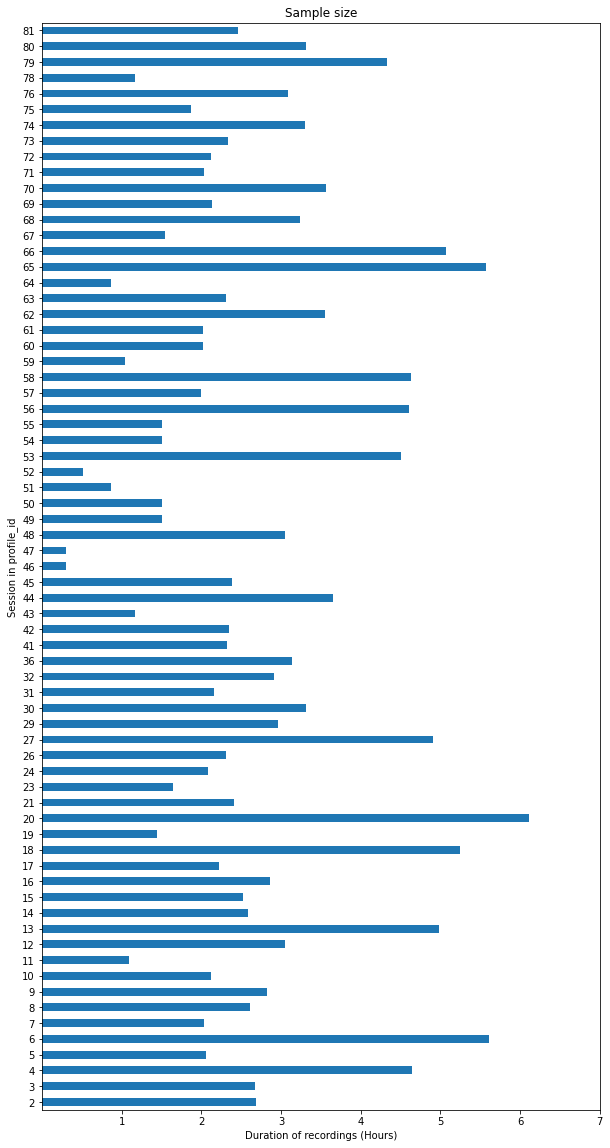

In [ ]:
counts = df.groupby('profile_id')['pm'].agg('count')              #profile_id gives us sessions
ax = counts.plot.barh(figsize=(10, 20), title='Sample size')
_ = ax.set_xticks(2*3600*np.arange(1, 8))                         # 2Hz sample rate
_ = ax.set_xticklabels(list(range(1, 8)))
_ = ax.set_xlabel('Duration of recordings (Hours)')
_ = ax.set_ylabel('Session in profile_id')

The plot shows that all the sessions range b/w 20 mins to around 6 hours apart from sessions '46' and '47'. 

**Sample distribution across hours of recordings**

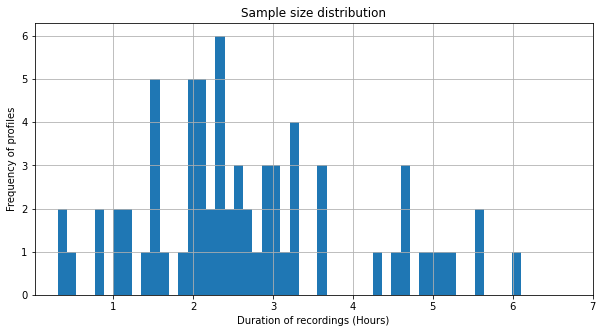

In [ ]:
ax = counts.plot.hist(title='Sample size distribution', bins=50, figsize=(10, 5), grid=True)
_ = ax.set_xticks(2*3600*np.arange(1, 8))                                                         # 2Hz sample rate
_ = ax.set_xticklabels(list(range(1, 8)))
_ = ax.set_xlabel('Duration of recordings (Hours)')
_ = ax.set_ylabel('Frequency of profiles')

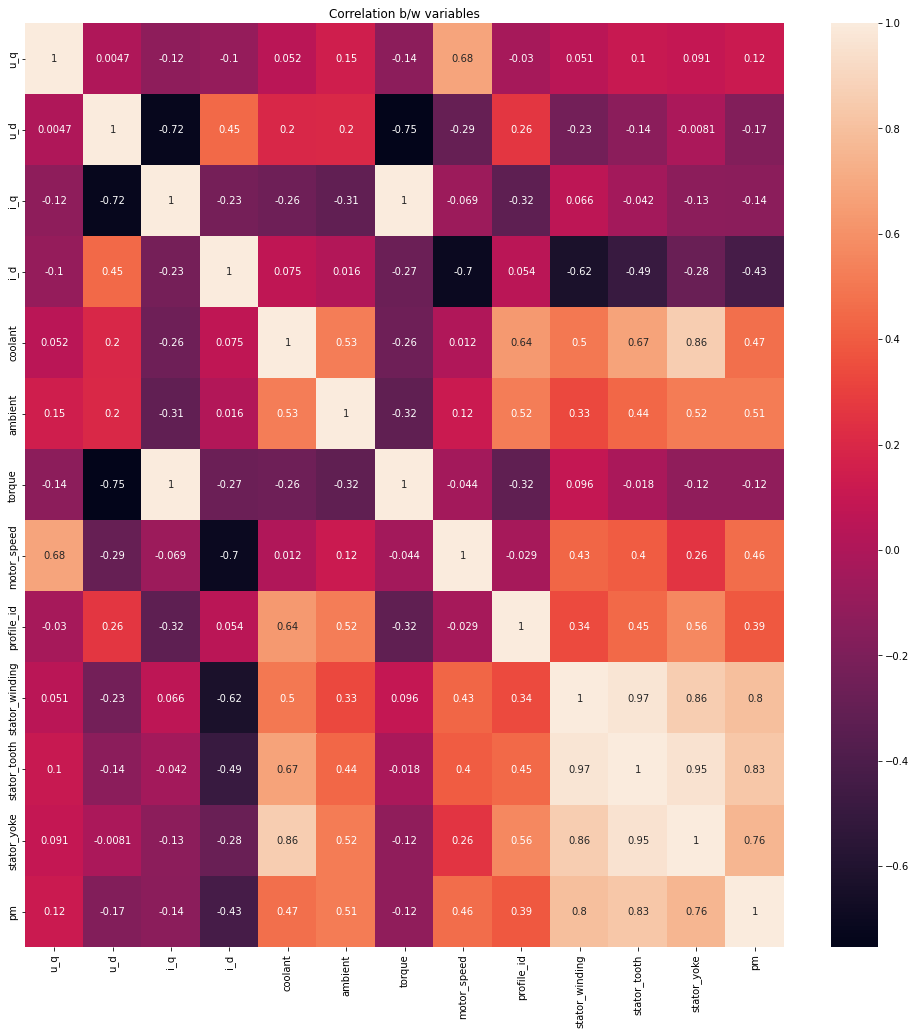

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(17,17))

# show a heatmap of the column variables
plt.title('Correlation b/w variables')
sns.heatmap(data=df.corr(), annot=True)

**Observations:** As Per the ploted heatmap we can say that - 



*   stator_tooth, stator_winding and stator_yoke are correlated between themselfs 

*   torque has the maximum correlation coeff 1 with i_q, and strong negative correlation with u_d

*   motor_speed has strong positive correlation with u_q and strong negative correlation with i_d
*   stator_yoke is significantly correlated with coolant and less significantly with ambient


*   stator_tooth and stator_winding have positive correlation with coolant and negative correlation with i_d


*   i_q and u_d have strong negative correlation









**Explore highly co-rrelated relationships**

1.   torque and i_q has  maximum correlation coeff 1



Text(0, 0.5, 'Current q-component')

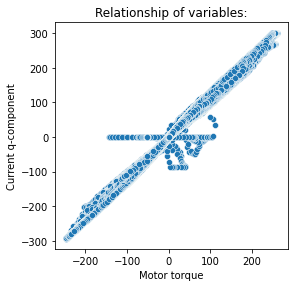

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(data=df, x='torque', y='i_q', ax=ax)
plt.title( f'Relationship of variables:')
plt.xlabel("Motor torque")
plt.ylabel('Current q-component')




2. stator_tooth, stator_winding - 0.97
3. stator_tooth, stator_yoke    - 0.95
4. stator_winding, stator_yoke  - 0.86 


Text(0, 0.5, 'Stator yoke temperature')

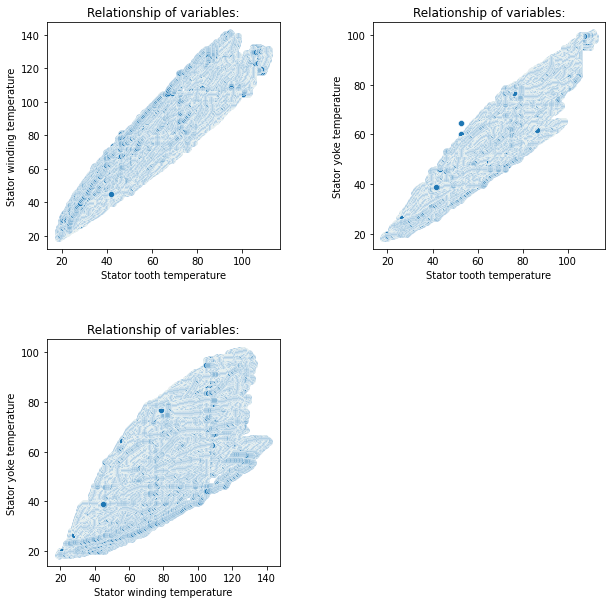

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#Plot 1
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(data=df, x='stator_tooth', y='stator_winding', ax=ax)
plt.title( f'Relationship of variables:')
plt.xlabel('Stator tooth temperature')
plt.ylabel('Stator winding temperature')

#Plot 2
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(data=df, x='stator_tooth', y='stator_yoke', ax=ax)
plt.title( f'Relationship of variables:')
plt.xlabel('Stator tooth temperature')
plt.ylabel('Stator yoke temperature')

#Plot 3
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(data=df, x='stator_winding', y='stator_yoke', ax=ax)
plt.title( f'Relationship of variables:')
plt.xlabel('Stator winding temperature')
plt.ylabel('Stator yoke temperature')

5. i_q and u_d have strong negative correlation

Text(0, 0.5, 'Current q-component')

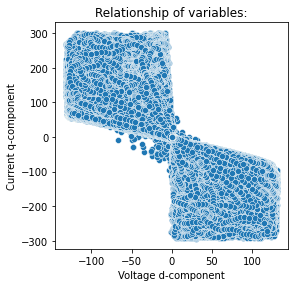

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#Plot 1
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(data=df, x='u_d', y='i_q', ax=ax)
plt.title( f'Relationship of variables:')
plt.xlabel('Voltage d-component')
plt.ylabel('Current q-component')

**Let's Plot 3D graphs exploring relationships b/w 3 variables**



1.   torque has the maximum correlation coeff 1 with i_q and strong negative correlation with u_d
2.   stator_tooth, stator_winding and stator_yoke are correlated between themselfs

3.   stator_yoke is significantly correlated with coolant and less significantly with ambient






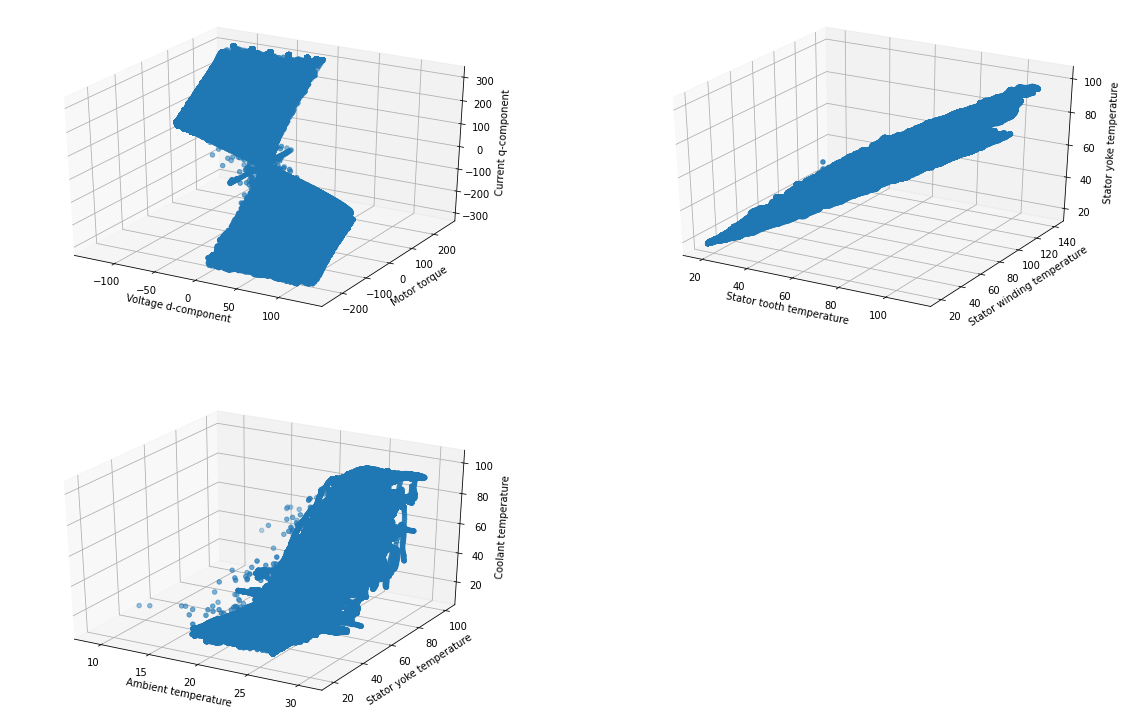

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# First subplot

ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.set_xlabel('Voltage d-component')
ax.set_ylabel('Motor torque')
ax.set_zlabel('Current q-component')

x = df['u_d']
y = df['torque']
z = df['i_q']

ax.scatter(x, y, z)

# First subplot

ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.set_xlabel('Stator tooth temperature')
ax.set_ylabel('Stator winding temperature')
ax.set_zlabel('Stator yoke temperature')

x = df['stator_tooth']
y = df['stator_winding']
z = df['stator_yoke']

ax.scatter(x, y, z)

# First subplot

ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.set_xlabel('Ambient temperature')
ax.set_ylabel('Stator yoke temperature')
ax.set_zlabel('Coolant temperature')

x = df['ambient']
y = df['stator_yoke']
z = df['coolant']

ax.scatter(x, y, z)

As per the graphs we can say that,


> Motor torque has linear dependence upon i_q and u-d components




> stator tooth, stator winding and stator yoke are highly dependent between themselvs

> stator yoke has non linear relationship with ambient and coolant temperature





**Distribution of independent variables**



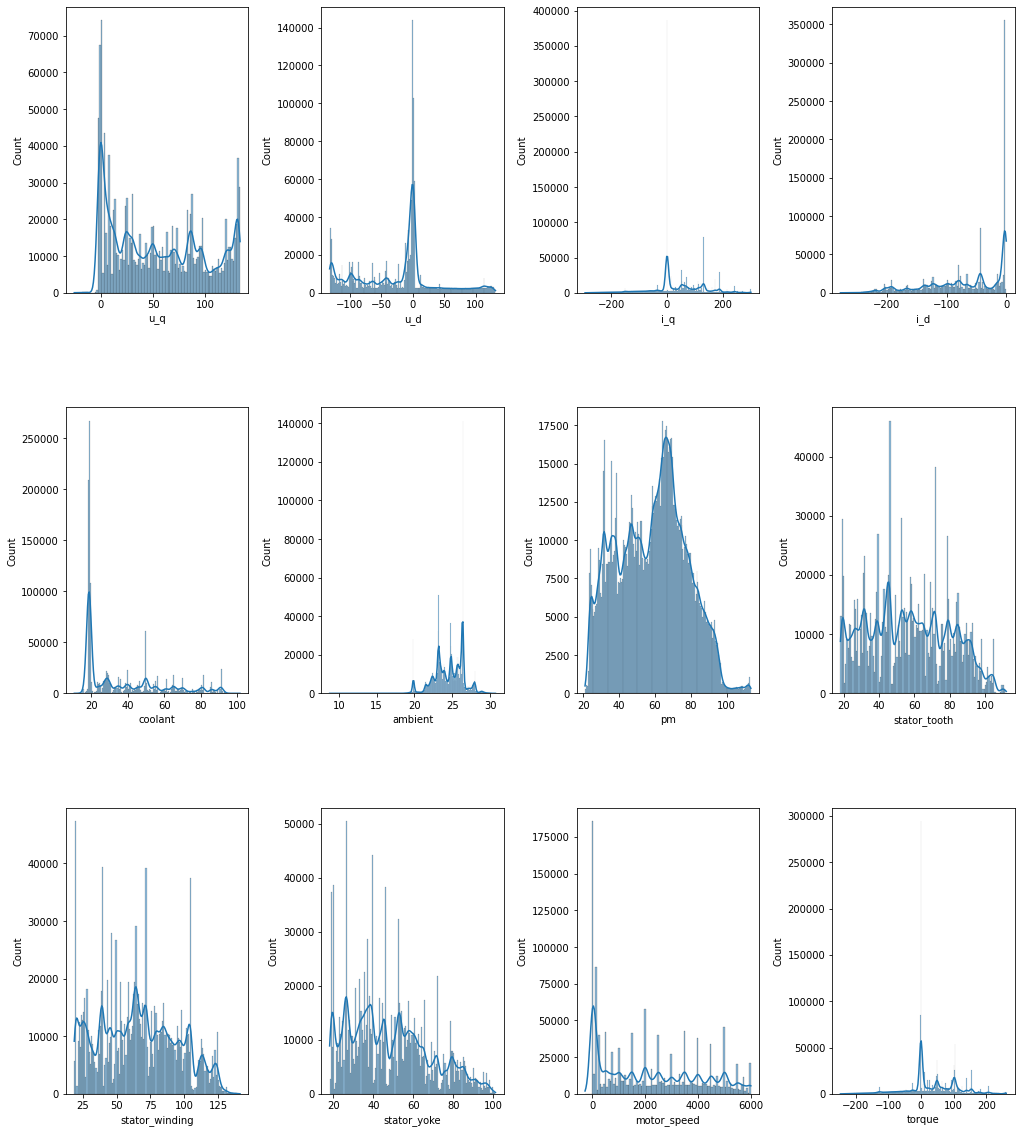

In [ ]:
fig = plt.figure(figsize=(17,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 4, 1)
sns.histplot(data=df, x='u_q', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 2)
sns.histplot(data=df, x='u_d', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 3)
sns.histplot(data=df, x='i_q', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 4)
sns.histplot(data=df, x='i_d', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 5)
sns.histplot(data=df, x='coolant', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 6)
sns.histplot(data=df, x='ambient', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 7)
sns.histplot(data=df, x='pm', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 8)
sns.histplot(data=df, x='stator_tooth', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 9)
sns.histplot(data=df, x='stator_winding', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 10)
sns.histplot(data=df, x='stator_yoke', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 11)
sns.histplot(data=df, x='motor_speed', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 12)
sns.histplot(data=df, x='torque', kde=True, ax=ax)

plt.show()



*   Input features show a significant spike in their distribution. This is reasonable as these are the values that are held during no excitation (resting/cooldown phase)
*   
target variable  temperatures are less spikey, indicating a slower progress or response to input features (read 'greater time constants'). 

*   for input features we can observe that zero value appears most frequently in columns representing coordinates for current and voltage.Coolant and ambient are measured in the same units and the highest peak of coolant is at the value 20 and the highest peak of of ambient is at the value 26.








**Let's check for the outliers for our input variables**

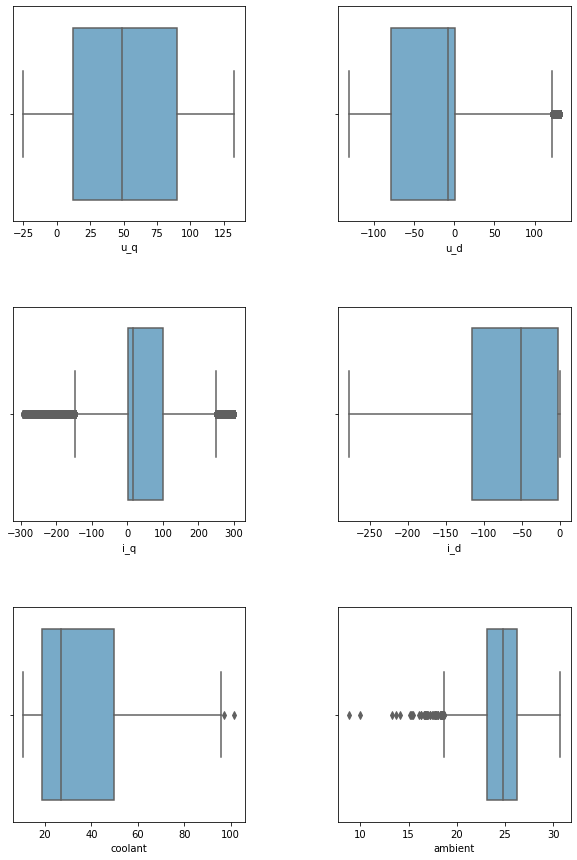

In [ ]:
fig = plt.figure(figsize=(10,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 2, 1)
sns.boxplot(x=df['u_q'], palette='Blues', ax=ax)

ax = fig.add_subplot(3, 2, 2)
sns.boxplot(x=df['u_d'], palette='Blues', ax=ax)

ax = fig.add_subplot(3, 2, 3)
sns.boxplot(x=df['i_q'], palette='Blues', ax=ax)

ax = fig.add_subplot(3, 2, 4)
sns.boxplot(x=df['i_d'], palette='Blues', ax=ax)

ax = fig.add_subplot(3, 2, 5)
sns.boxplot(x=df['coolant'], palette='Blues', ax=ax)

ax = fig.add_subplot(3, 2, 6)
sns.boxplot(x=df['ambient'], palette='Blues', ax=ax)

plt.show()



> From the plots we can say that coolant, ambient, i_q and u_d have some outliers.



**We selected data with profile id 65, 72 into testing dataset and rest of the data into training and validation dataset.**

In [ ]:
All_profile = df['profile_id'].value_counts().index.values
test_set_profiles = [65, 72]
train_set_profiles = [id for id in All_profile if id not in test_set_profiles]

train_df = df.loc[df['profile_id'].isin(train_set_profiles)].copy()
test_df = df.loc[df['profile_id'].isin(test_set_profiles)].copy()

len(train_df['profile_id'].value_counts()), len(test_df['profile_id'].value_counts())

(67, 2)

In [ ]:
df

,u_q,u_d,i_q,i_d,coolant,ambient,torque,motor_speed,profile_id,stator_winding,stator_tooth,stator_yoke,pm
0,-0.450682,-0.350055,0.000328,0.004419,18.805172,19.850691,1.871008e-01,0.002866,17,19.086670,18.293219,18.316547,24.554214
1,-0.325737,-0.305803,-0.000785,0.000606,18.818571,19.850672,2.454175e-01,0.000257,17,19.092390,18.294807,18.314955,24.538078
2,-0.440864,-0.372503,0.000386,0.001290,18.828770,19.850657,1.766153e-01,0.002355,17,19.089380,18.294094,18.326307,24.544693
3,-0.327026,-0.316199,0.002046,0.000026,18.835567,19.850647,2.383027e-01,0.006105,17,19.083031,18.292542,18.330833,24.554018
4,-0.471150,-0.332272,0.037184,-0.064317,18.857033,19.850639,2.081967e-01,0.003133,17,19.082525,18.291428,18.326662,24.565397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,0.791801,1.097528,-2.000169,30.721298,23.989078,-8.116730e-60,0.000380,71,45.274497,41.934347,38.653720,62.147780
1330812,-2.258684,0.778900,1.097569,-2.000499,30.721306,23.970700,-5.815891e-60,0.002985,71,45.239017,41.868923,38.656328,62.142646
1330813,-2.130312,0.804914,1.098765,-1.999268,30.721312,23.977234,-4.167268e-60,0.002301,71,45.211576,41.804819,38.650923,62.138387
1330814,-2.268498,0.763091,1.095696,-2.000999,30.721316,24.001421,-2.985978e-60,0.005662,71,45.193508,41.762220,38.655686,62.133422


In [ ]:
train_df

,u_q,u_d,i_q,i_d,coolant,ambient,torque,motor_speed,profile_id,stator_winding,stator_tooth,stator_yoke,pm
0,-0.450682,-0.350055,0.000328,0.004419,18.805172,19.850691,1.871008e-01,0.002866,17,19.086670,18.293219,18.316547,24.554214
1,-0.325737,-0.305803,-0.000785,0.000606,18.818571,19.850672,2.454175e-01,0.000257,17,19.092390,18.294807,18.314955,24.538078
2,-0.440864,-0.372503,0.000386,0.001290,18.828770,19.850657,1.766153e-01,0.002355,17,19.089380,18.294094,18.326307,24.544693
3,-0.327026,-0.316199,0.002046,0.000026,18.835567,19.850647,2.383027e-01,0.006105,17,19.083031,18.292542,18.330833,24.554018
4,-0.471150,-0.332272,0.037184,-0.064317,18.857033,19.850639,2.081967e-01,0.003133,17,19.082525,18.291428,18.326662,24.565397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,0.791801,1.097528,-2.000169,30.721298,23.989078,-8.116730e-60,0.000380,71,45.274497,41.934347,38.653720,62.147780
1330812,-2.258684,0.778900,1.097569,-2.000499,30.721306,23.970700,-5.815891e-60,0.002985,71,45.239017,41.868923,38.656328,62.142646
1330813,-2.130312,0.804914,1.098765,-1.999268,30.721312,23.977234,-4.167268e-60,0.002301,71,45.211576,41.804819,38.650923,62.138387
1330814,-2.268498,0.763091,1.095696,-2.000999,30.721316,24.001421,-2.985978e-60,0.005662,71,45.193508,41.762220,38.655686,62.133422


In [ ]:
test_df

,u_q,u_d,i_q,i_d,coolant,ambient,torque,motor_speed,profile_id,stator_winding,stator_tooth,stator_yoke,pm
984807,-1.887356,1.946434,1.098022,-2.001102,30.721162,23.886441,0.000187,0.022686,72,32.113178,31.291477,30.660012,37.112483
984808,0.604919,0.109622,26.184500,-8.944310,30.721209,23.885538,18.702919,27.444022,72,32.115623,31.296847,30.708855,37.111457
984809,4.665253,-6.753488,80.725465,-35.659968,30.721242,23.883657,63.775405,116.920677,72,32.122736,31.283346,30.743853,37.116662
984810,9.206368,-16.699363,125.454513,-59.658771,30.721266,23.880380,101.423441,251.384409,72,32.130268,31.283340,30.777050,36.924837
984811,14.197583,-28.559625,158.080952,-77.320911,30.720804,23.874869,128.924817,418.588814,72,32.117775,31.212032,30.820728,36.922961
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082583,58.732574,113.107700,-155.533385,-106.013023,54.234283,27.972493,-131.969440,2475.614605,65,110.536934,92.167688,75.501177,86.033969
1082584,59.347737,112.063716,-154.783568,-109.789794,54.234283,27.972493,-131.889565,2497.023037,65,110.536934,92.167688,75.501177,86.033969
1082585,56.137882,108.349656,-152.945533,-124.216542,54.234283,27.972493,-131.793512,2515.413765,65,110.536934,92.167688,75.501177,86.033969
1082586,50.692137,104.121110,-149.690989,-140.955000,54.234283,27.972493,-131.434445,2529.231155,65,110.536934,92.167688,75.501177,86.033969


In [ ]:
# As profile_id is an id for each measurement session, we can remove it from any furthur analysis and model building.
train_df.drop('profile_id',axis = 1,inplace=True)
test_df.drop('profile_id',axis = 1,inplace=True)

In [ ]:
train_df

,u_q,u_d,i_q,i_d,coolant,ambient,torque,motor_speed,stator_winding,stator_tooth,stator_yoke,pm
0,-0.450682,-0.350055,0.000328,0.004419,18.805172,19.850691,1.871008e-01,0.002866,19.086670,18.293219,18.316547,24.554214
1,-0.325737,-0.305803,-0.000785,0.000606,18.818571,19.850672,2.454175e-01,0.000257,19.092390,18.294807,18.314955,24.538078
2,-0.440864,-0.372503,0.000386,0.001290,18.828770,19.850657,1.766153e-01,0.002355,19.089380,18.294094,18.326307,24.544693
3,-0.327026,-0.316199,0.002046,0.000026,18.835567,19.850647,2.383027e-01,0.006105,19.083031,18.292542,18.330833,24.554018
4,-0.471150,-0.332272,0.037184,-0.064317,18.857033,19.850639,2.081967e-01,0.003133,19.082525,18.291428,18.326662,24.565397
...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,0.791801,1.097528,-2.000169,30.721298,23.989078,-8.116730e-60,0.000380,45.274497,41.934347,38.653720,62.147780
1330812,-2.258684,0.778900,1.097569,-2.000499,30.721306,23.970700,-5.815891e-60,0.002985,45.239017,41.868923,38.656328,62.142646
1330813,-2.130312,0.804914,1.098765,-1.999268,30.721312,23.977234,-4.167268e-60,0.002301,45.211576,41.804819,38.650923,62.138387
1330814,-2.268498,0.763091,1.095696,-2.000999,30.721316,24.001421,-2.985978e-60,0.005662,45.193508,41.762220,38.655686,62.133422


# **1. Model Implementation for motor_speed, stator, rotar and york temperatures as dependent variables**

Let's rerrange the columns

In [ ]:
# extracting independent variable
X = train_df.iloc[:,:-4].values            #All are independent varirables 
# extracting dependent variable
Y = train_df.iloc[:,-4:].values            #dependent varirables
print(X.shape)
print(Y.shape)

(1275421, 8)
(1275421, 4)


In [ ]:
# extracting independent variable
test_X = test_df.iloc[:,:-4].values            #All are independent varirables 
# extracting dependent variable
test_Y = test_df.iloc[:,-4:].values            #dependent varirables
print(test_X.shape)
print(test_Y.shape)

(55395, 8)
(55395, 4)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

###**1. Basic Multiple-Output Linear Regression OLS**

Lets train a normal multiple-output linear regression model on the data and see what results we obtain:

In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

lr_scores = cross_val_score(lin_reg, X_train, y_train, 
                         scoring='neg_mean_squared_error', cv=10)

linear_train_acc = (lin_reg.score(X_train,y_train))*100
linear_val_acc = (lin_reg.score(X_test,y_test))*100

print(f"Train accuracy: {linear_train_acc}")
print(f"Validation accuracy: {linear_val_acc}")

Train accuracy: 73.73493538305107
Validation accuracy: 73.80036654993688


**Evaluate the model with validation dataset**

In [ ]:
val_preds = lin_reg.predict(X_test)
calculation = pd.DataFrame(np.c_[y_test,val_preds], columns = ['Original stator_winding','Original stator_tooth','Original stator_yoke','Original PM','Predicted stator_winding','Predicted stator_yoke','Predicted stator_winding','Predicted PM'])
calculation.head(5)

,Original stator_winding,Original stator_tooth,Original stator_yoke,Original PM,Predicted stator_winding,Predicted stator_yoke,Predicted stator_winding,Predicted PM
0,49.386261,41.587067,33.141685,45.204563,45.422613,38.744623,31.101204,45.440211
1,104.791176,92.533485,79.379364,92.941620,108.802041,95.156487,81.020688,94.117237
2,42.892166,38.646206,31.298260,46.116508,51.893027,43.766167,33.560229,47.783099
3,71.871368,60.666537,49.302493,52.905110,65.968350,55.648158,44.591857,61.102824
4,86.507082,75.437217,64.135956,71.415192,82.150230,70.510295,60.859937,61.823743


In [ ]:
r2_linear = r2_score(y_test, val_preds)*100
rms_linear = sqrt(mean_squared_error(y_test, val_preds))
mae_linear = mean_absolute_error(y_test, val_preds)
print(f"R^2 score of model on validation data is {r2_linear} %")
print(f"Root mean squared error on validation data is {rms_linear}")
print(f"Mean absolute error on validation data is {mae_linear}")

R^2 score of model on validation data is 73.80036654993688 %
Root mean squared error on validation data is 11.828028967825572
Mean absolute error on validation data is 8.670141225824914


**Evaluate the model with Holdout dataset**

In [ ]:
test_preds = lin_reg.predict(test_X)
calculation = pd.DataFrame(np.c_[test_Y,test_preds], columns = ['Original stator_winding','Original stator_tooth','Original stator_yoke','Original Motor_speed','Predicted stator_winding','Predicted stator_yoke','Predicted stator_winding','Predicted Motor_speed'])
calculation.head(5)

,Original stator_winding,Original stator_tooth,Original stator_yoke,Original Motor_speed,Predicted stator_winding,Predicted stator_yoke,Predicted stator_winding,Predicted Motor_speed
0,32.113178,31.291477,30.660012,37.112483,43.156915,39.539653,36.114968,49.126398
1,32.115623,31.296847,30.708855,37.111457,45.253368,40.665740,36.816268,48.454736
2,32.122736,31.283346,30.743853,37.116662,54.132059,45.652369,39.813042,47.704348
3,32.130268,31.283340,30.777050,36.924837,62.129223,50.257927,42.560975,47.550674
4,32.117775,31.212032,30.820728,36.922961,67.967578,53.734893,44.621699,47.866648


In [ ]:
linear_test_acc = (lin_reg.score(test_X,test_Y))*100
r2_linear_hold = r2_score(test_Y,test_preds)*100
rms_linear_hold = sqrt(mean_squared_error(test_Y,test_preds))
mae_linear_hold = mean_absolute_error(test_Y,test_preds)
print(f"Test accuracy: {linear_test_acc}")
print(f"R^2 score of model on holdout data is {r2_linear_hold} %")
print(f"Root mean squared error on holdout data is {rms_linear_hold}")
print(f"Mean absolute error on holdout data is {mae_linear_hold}")

Test accuracy: 58.62069470937974
R^2 score of model on holdout data is 58.62069470937974 %
Root mean squared error on holdout data is 12.648914221211543
Mean absolute error on holdout data is 9.904085921875456


**Visualizing the test results of Validation dataset**

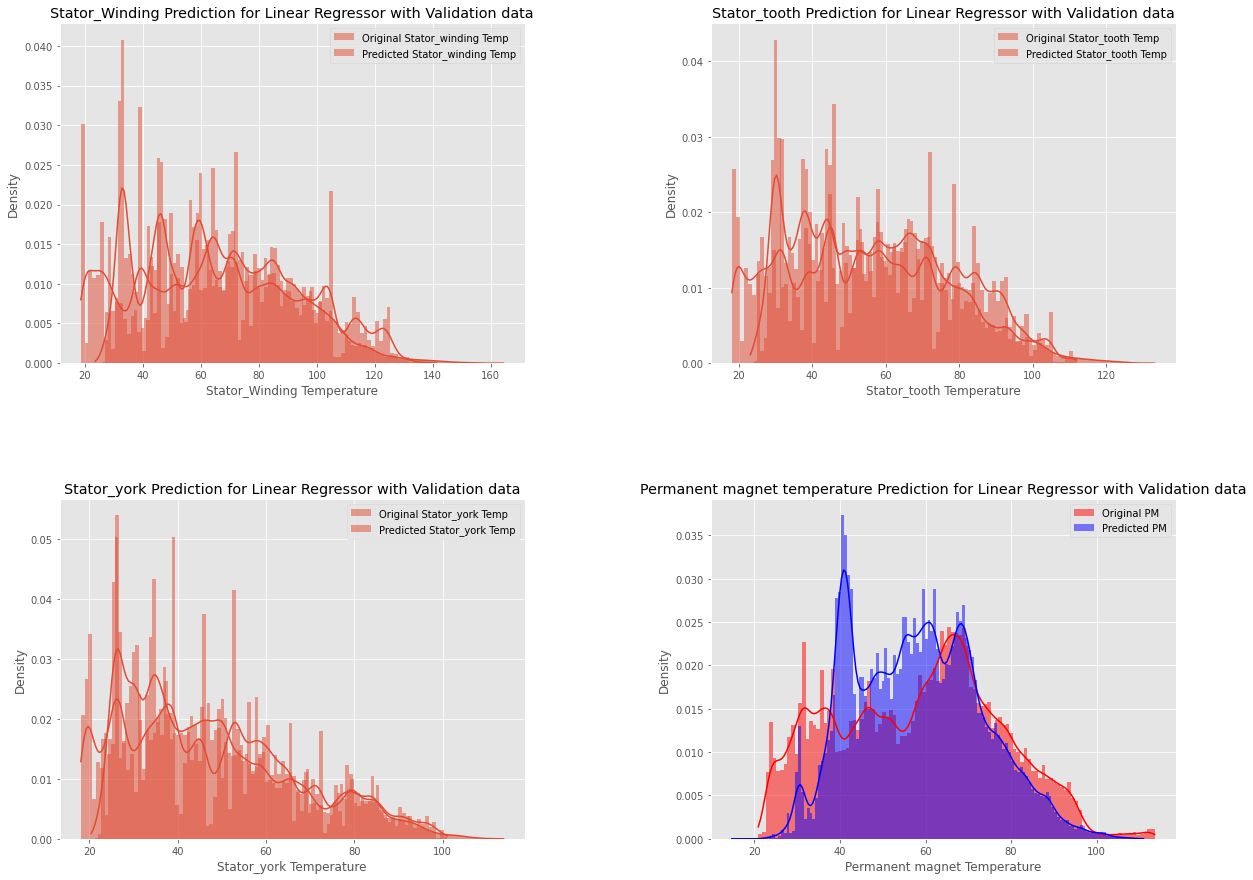

In [ ]:
fig = plt.style.use('ggplot') 
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2 , 1)
sns.histplot(y_test[:,-4:-3], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_winding Temp',ax=ax)
sns.histplot(val_preds[:,-4:-3], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_winding Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_Winding Prediction for Linear Regressor with Validation data") 
plt.xlabel("Stator_Winding Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 2)
sns.histplot(y_test[:,-3:-2], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_tooth Temp',ax=ax)
sns.histplot(val_preds[:,-3:-2], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_tooth Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_tooth Prediction for Linear Regressor with Validation data") 
plt.xlabel("Stator_tooth Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 3)
sns.histplot(y_test[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Original Stator_york Temp',ax=ax)
sns.histplot(val_preds[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Predicted Stator_york Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_york Prediction for Linear Regressor with Validation data") 
plt.xlabel("Stator_york Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 4)
sns.histplot(y_test[:,-1], color="red", kde=True, stat="density", linewidth=0, label = 'Original PM',ax=ax)
sns.histplot(val_preds[:,-1], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted PM',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Permanent magnet temperature Prediction for Linear Regressor with Validation data") 
plt.xlabel("Permanent magnet Temperature")
plt.ylabel("Density")
plt.show()

**Visualizing the test results of Holdout dataset**

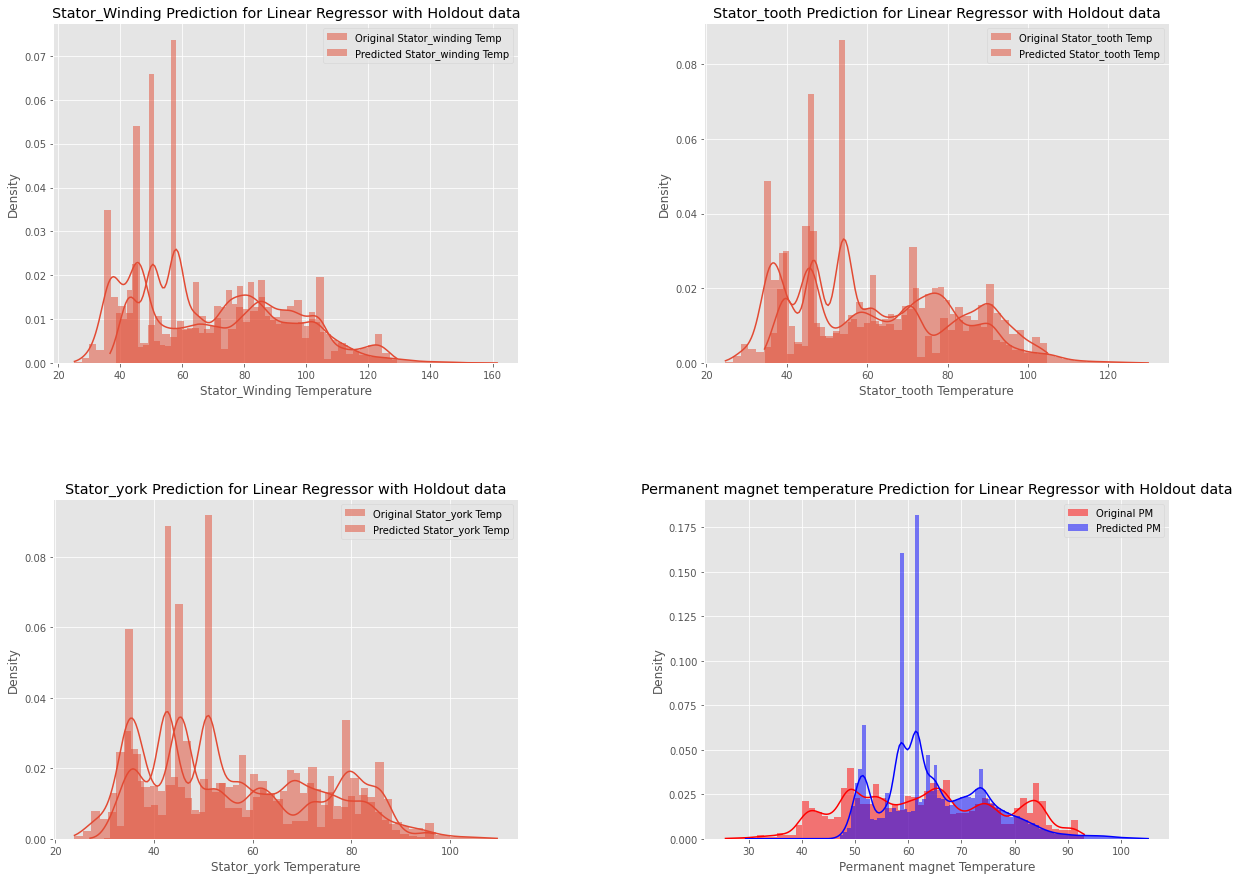

In [ ]:
fig = plt.style.use('ggplot') 
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2 , 1)
sns.histplot(test_Y[:,-4:-3], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_winding Temp',ax=ax)
sns.histplot(test_preds[:,-4:-3], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_winding Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_Winding Prediction for Linear Regressor with Holdout data") 
plt.xlabel("Stator_Winding Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 2)
sns.histplot(test_Y[:,-3:-2], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_tooth Temp',ax=ax)
sns.histplot(test_preds[:,-3:-2], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_tooth Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_tooth Prediction for Linear Regressor with Holdout data") 
plt.xlabel("Stator_tooth Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 3)
sns.histplot(test_Y[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Original Stator_york Temp',ax=ax)
sns.histplot(test_preds[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Predicted Stator_york Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_york Prediction for Linear Regressor with Holdout data") 
plt.xlabel("Stator_york Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 4)
sns.histplot(test_Y[:,-1], color="red", kde=True, stat="density", linewidth=0, label = 'Original PM',ax=ax)
sns.histplot(test_preds[:,-1], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted PM',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Permanent magnet temperature Prediction for Linear Regressor with Holdout data") 
plt.xlabel("Permanent magnet Temperature")
plt.ylabel("Density")
plt.show()

### **2. K-Nearest Neighbour Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=9,p=1,metric='minkowski')
knn_reg.fit(X_train,y_train)

knn_train_acc = (knn_reg.score(X_train,y_train))*100
knn_val_acc = (knn_reg.score(X_test,y_test))*100

print(f"Train accuracy: {knn_train_acc}")
print(f"Validation accuracy: {knn_val_acc}")

Train accuracy: 95.48967169010064
Validation accuracy: 94.28103970428214


**Evaluate the model with validation dataset**

In [ ]:
val_preds = knn_reg.predict(X_test)
calculation = pd.DataFrame(np.c_[y_test,val_preds], columns = ['Original stator_winding','Original stator_tooth','Original stator_yoke','Original PM','Predicted stator_winding','Predicted stator_yoke','Predicted stator_winding','Predicted PM'])
calculation.head(5)

,Original stator_winding,Original stator_tooth,Original stator_yoke,Original PM,Predicted stator_winding,Predicted stator_yoke,Predicted stator_winding,Predicted PM
0,49.386261,41.587067,33.141685,45.204563,49.362668,41.410453,33.086171,45.225408
1,104.791176,92.533485,79.379364,92.941620,104.791176,92.696859,79.399345,93.072395
2,42.892166,38.646206,31.298260,46.116508,42.863318,38.627797,31.304141,45.615419
3,71.871368,60.666537,49.302493,52.905110,63.222062,55.106144,46.111521,56.681948
4,86.507082,75.437217,64.135956,71.415192,78.519783,69.775981,60.698171,69.005301


In [ ]:
r2_knn = r2_score(y_test, val_preds)*100
rms_knn = sqrt(mean_squared_error(y_test, val_preds))
mae_knn = mean_absolute_error(y_test, val_preds)
print(f"R^2 score of model on validation data is {r2_knn} %")
print(f"Root mean squared error on validation data is {rms_knn}")
print(f"Mean absolute error on validation data is {mae_knn}")

R^2 score of model on validation data is 94.28103970428214 %
Root mean squared error on validation data is 5.562492654633696
Mean absolute error on validation data is 2.548228671060075


**Evaluate the model with Holdout dataset**

In [ ]:
test_preds = knn_reg.predict(test_X)
calculation = pd.DataFrame(np.c_[test_Y,test_preds], columns = ['Original stator_winding','Original stator_tooth','Original stator_yoke','Original PM','Predicted stator_winding','Predicted stator_yoke','Predicted stator_winding','Predicted PM'])
calculation.head(5)

,Original stator_winding,Original stator_tooth,Original stator_yoke,Original PM,Predicted stator_winding,Predicted stator_yoke,Predicted stator_winding,Predicted PM
0,32.113178,31.291477,30.660012,37.112483,70.917302,63.753538,52.792561,73.515892
1,32.115623,31.296847,30.708855,37.111457,50.273871,41.490635,33.203256,45.949992
2,32.122736,31.283346,30.743853,37.116662,46.884592,39.996376,33.001488,46.721655
3,32.130268,31.283340,30.777050,36.924837,49.833797,43.043157,36.650634,45.418517
4,32.117775,31.212032,30.820728,36.922961,69.688023,56.476083,45.627193,59.692198


In [ ]:
knn_test_acc = (knn_reg.score(test_X,test_Y))*100
r2_knn_hold = r2_score(test_Y,test_preds)*100
rms_knn_hold = sqrt(mean_squared_error(test_Y,test_preds))
mae_knn_hold = mean_absolute_error(test_Y,test_preds)
print(f"Test accuracy: {knn_test_acc}")
print(f"R^2 score of model on holdout data is {r2_knn_hold} %")
print(f"Root mean squared error on holdout data is {rms_knn_hold}")
print(f"Mean absolute error on holdout data is {mae_knn_hold}")

Test accuracy: 48.31217526896712
R^2 score of model on holdout data is 48.31217526896712 %
Root mean squared error on holdout data is 14.14751859282156
Mean absolute error on holdout data is 11.55864092675221


**Visualizing the test results of Validation dataset**

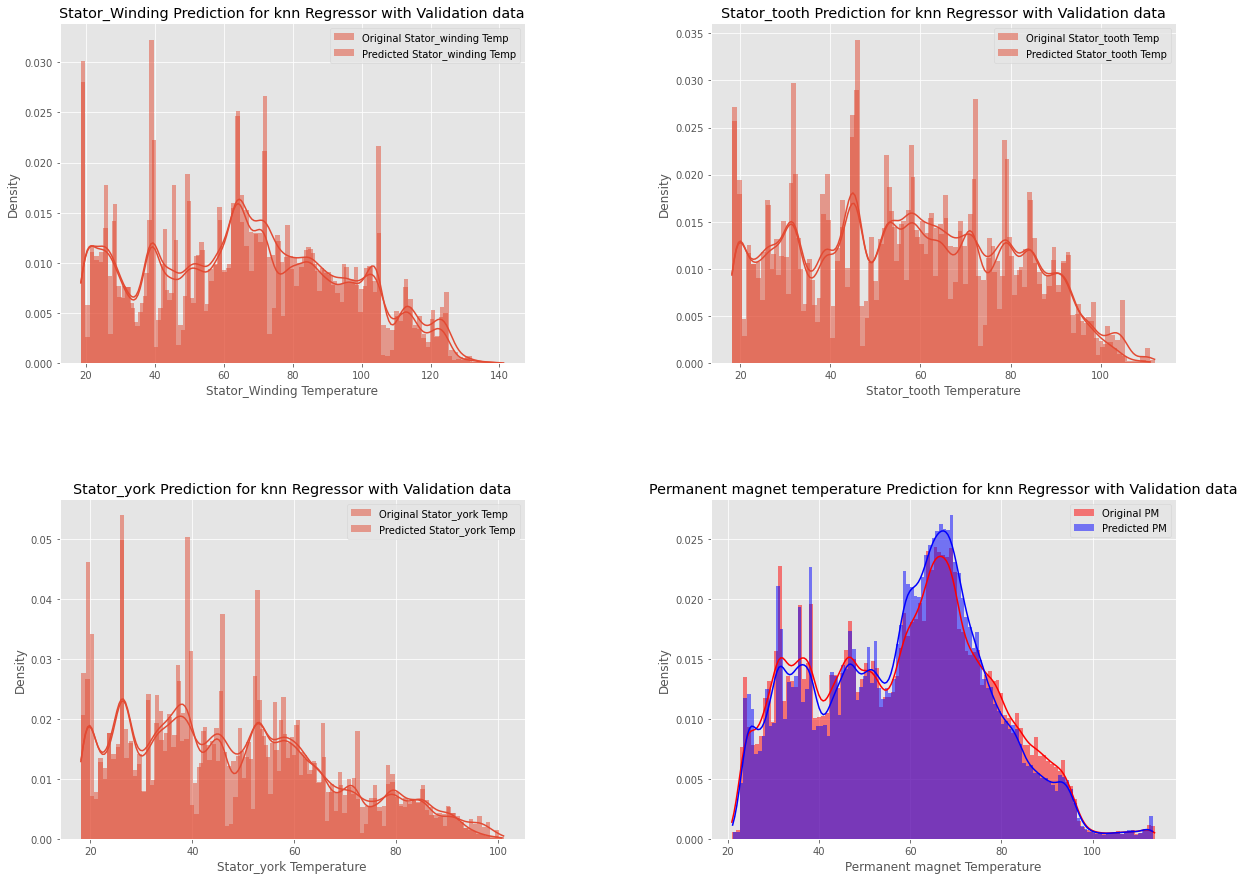

In [ ]:
fig = plt.style.use('ggplot') 
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2 , 1)
sns.histplot(y_test[:,-4:-3], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_winding Temp',ax=ax)
sns.histplot(val_preds[:,-4:-3], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_winding Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_Winding Prediction for knn Regressor with Validation data") 
plt.xlabel("Stator_Winding Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 2)
sns.histplot(y_test[:,-3:-2], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_tooth Temp',ax=ax)
sns.histplot(val_preds[:,-3:-2], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_tooth Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_tooth Prediction for knn Regressor with Validation data") 
plt.xlabel("Stator_tooth Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 3)
sns.histplot(y_test[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Original Stator_york Temp',ax=ax)
sns.histplot(val_preds[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Predicted Stator_york Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_york Prediction for knn Regressor with Validation data") 
plt.xlabel("Stator_york Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 4)
sns.histplot(y_test[:,-1], color="red", kde=True, stat="density", linewidth=0, label = 'Original PM',ax=ax)
sns.histplot(val_preds[:,-1], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted PM',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Permanent magnet temperature Prediction for knn Regressor with Validation data") 
plt.xlabel("Permanent magnet Temperature")
plt.ylabel("Density")
plt.show()

**Visualizing the test results of Holdout dataset**

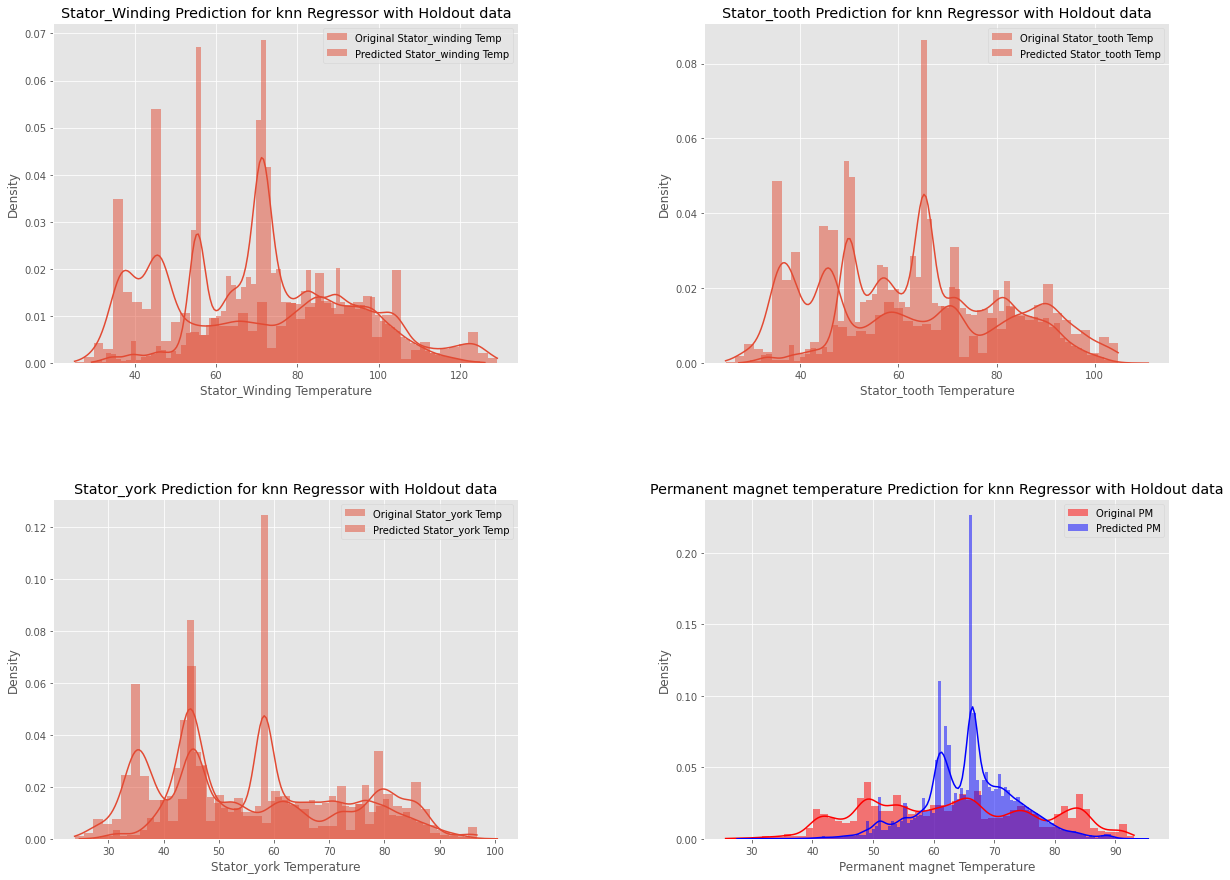

In [ ]:
fig = plt.style.use('ggplot') 
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2 , 1)
sns.histplot(test_Y[:,-4:-3], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_winding Temp',ax=ax)
sns.histplot(test_preds[:,-4:-3], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_winding Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_Winding Prediction for knn Regressor with Holdout data") 
plt.xlabel("Stator_Winding Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 2)
sns.histplot(test_Y[:,-3:-2], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_tooth Temp',ax=ax)
sns.histplot(test_preds[:,-3:-2], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_tooth Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_tooth Prediction for knn Regressor with Holdout data") 
plt.xlabel("Stator_tooth Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 3)
sns.histplot(test_Y[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Original Stator_york Temp',ax=ax)
sns.histplot(test_preds[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Predicted Stator_york Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_york Prediction for knn Regressor with Holdout data") 
plt.xlabel("Stator_york Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 4)
sns.histplot(test_Y[:,-1], color="red", kde=True, stat="density", linewidth=0, label = 'Original PM',ax=ax)
sns.histplot(test_preds[:,-1], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted PM',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Permanent magnet temperature Prediction for knn Regressor with Holdout data") 
plt.xlabel("Permanent magnet Temperature")
plt.ylabel("Density")
plt.show()

### **3. Polynomial Regression**

In [ ]:
quad = PolynomialFeatures (degree = 2)
x_train = quad.fit_transform(X_train)
x_test = quad.fit_transform(X_test)

plr = LinearRegression().fit(x_train,y_train)

plr_train_acc = (plr.score(x_train,y_train))*100
plr_val_acc = (plr.score(x_test,y_test))*100

print(f"Train accuracy: {plr_train_acc}")
print(f"Validation accuracy: {plr_val_acc}")

Train accuracy: 85.12961602247442
Validation accuracy: 85.04384995208946


**Evaluate the model with validation dataset**

In [ ]:
val_preds = plr.predict(x_test)
calculation = pd.DataFrame(np.c_[y_test,val_preds], columns = ['Original stator_winding','Original stator_tooth','Original stator_yoke','Original Motor_speed','Predicted stator_winding','Predicted stator_yoke','Predicted stator_winding','Predicted Motor_speed'])
calculation.head(5)

,Original stator_winding,Original stator_tooth,Original stator_yoke,Original Motor_speed,Predicted stator_winding,Predicted stator_yoke,Predicted stator_winding,Predicted Motor_speed
0,49.386261,41.587067,33.141685,45.204563,46.123874,39.053459,31.284556,44.962170
1,104.791176,92.533485,79.379364,92.941620,109.177740,94.436661,80.827802,88.808054
2,42.892166,38.646206,31.298260,46.116508,40.869374,36.532029,29.328795,43.979542
3,71.871368,60.666537,49.302493,52.905110,60.679914,51.970921,42.389189,55.287804
4,86.507082,75.437217,64.135956,71.415192,79.428132,69.282444,60.156146,63.134025


In [ ]:
r2_plr = r2_score(y_test, val_preds)*100
rms_plr = sqrt(mean_squared_error(y_test, val_preds))
mae_plr = mean_absolute_error(y_test, val_preds)
print(f"R^2 score of model on validation data is {r2_plr} %")
print(f"Root mean squared error on validation data is {rms_plr}")
print(f"Mean absolute error on validation data is {mae_plr}")

R^2 score of model on validation data is 85.04384995208946 %
Root mean squared error on validation data is 8.94367911880788
Mean absolute error on validation data is 5.828545350895346


**Evaluate the model with Holdout dataset**

In [ ]:
test_x = quad.fit_transform(test_X)

test_preds = plr.predict(test_x)
calculation = pd.DataFrame(np.c_[test_Y,test_preds], columns = ['Original stator_winding','Original stator_tooth','Original stator_yoke','Original PM','Predicted stator_winding','Predicted stator_yoke','Predicted stator_winding','Predicted PM'])
calculation.head(5)

,Original stator_winding,Original stator_tooth,Original stator_yoke,Original PM,Predicted stator_winding,Predicted stator_yoke,Predicted stator_winding,Predicted PM
0,32.113178,31.291477,30.660012,37.112483,40.137973,37.237614,34.637863,47.839050
1,32.115623,31.296847,30.708855,37.111457,45.772287,41.325444,37.299099,51.242065
2,32.122736,31.283346,30.743853,37.116662,70.755941,59.012659,48.724958,66.003548
3,32.130268,31.283340,30.777050,36.924837,89.664665,72.031804,56.872378,76.864356
4,32.117775,31.212032,30.820728,36.922961,99.660779,78.548724,60.712857,81.815923


In [ ]:
plr_test_acc = (plr.score(test_x,test_Y))*100
r2_plr_hold = r2_score(test_Y,test_preds)*100
rms_plr_hold = sqrt(mean_squared_error(test_Y,test_preds))
mae_plr_hold = mean_absolute_error(test_Y,test_preds)
print(f"Test accuracy: {plr_test_acc}")
print(f"R^2 score of model on holdout data is {r2_plr_hold} %")
print(f"Root mean squared error on holdout data is {rms_plr_hold}")
print(f"Mean absolute error on holdout data is {mae_plr_hold}")

Test accuracy: 75.10348899770946
R^2 score of model on holdout data is 75.10348899770946 %
Root mean squared error on holdout data is 9.50029464637692
Mean absolute error on holdout data is 7.052880874300104


**Visualizing the test results of Validation dataset**

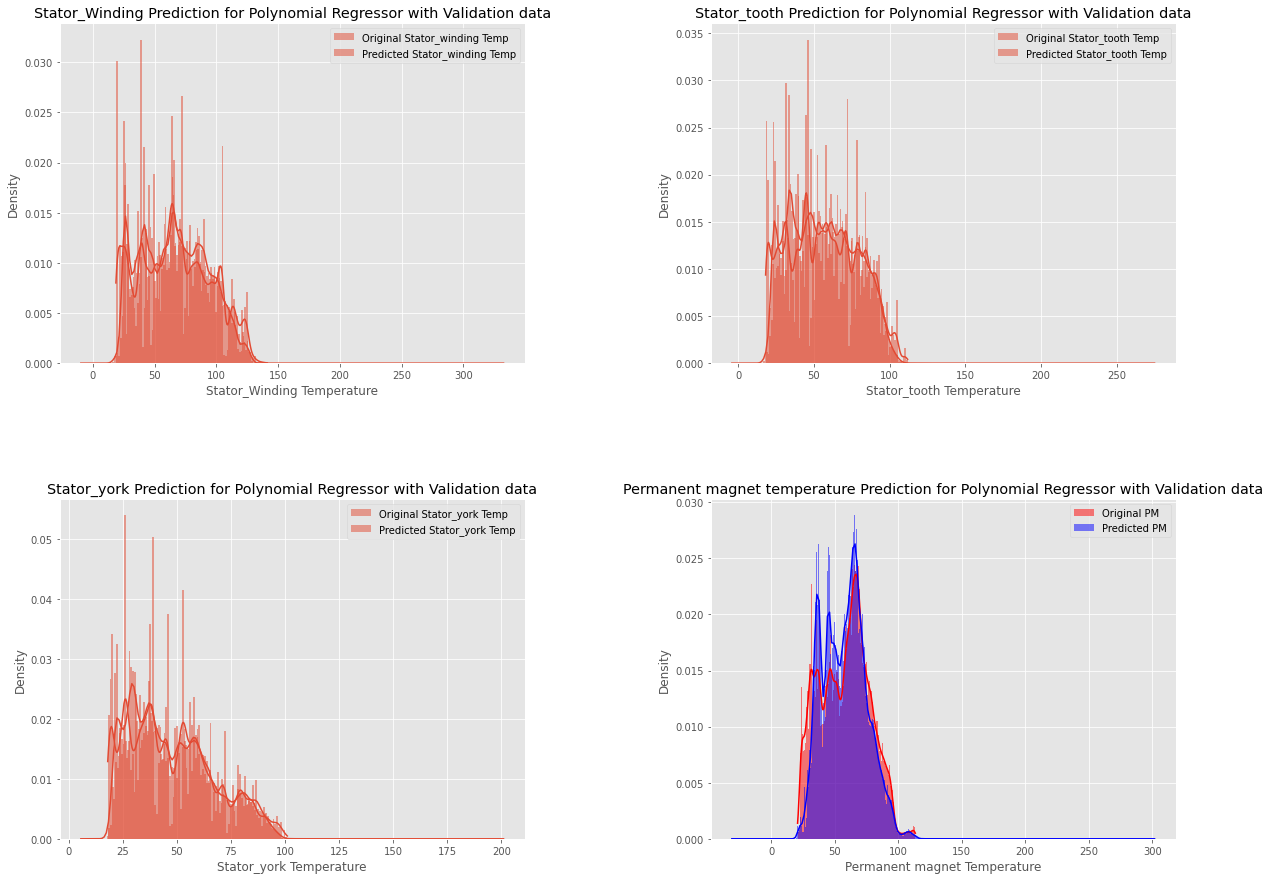

In [ ]:
fig = plt.style.use('ggplot') 
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2 , 1)
sns.histplot(y_test[:,-4:-3], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_winding Temp',ax=ax)
sns.histplot(val_preds[:,-4:-3], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_winding Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_Winding Prediction for Polynomial Regressor with Validation data") 
plt.xlabel("Stator_Winding Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 2)
sns.histplot(y_test[:,-3:-2], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_tooth Temp',ax=ax)
sns.histplot(val_preds[:,-3:-2], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_tooth Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_tooth Prediction for Polynomial Regressor with Validation data") 
plt.xlabel("Stator_tooth Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 3)
sns.histplot(y_test[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Original Stator_york Temp',ax=ax)
sns.histplot(val_preds[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Predicted Stator_york Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_york Prediction for Polynomial Regressor with Validation data") 
plt.xlabel("Stator_york Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 4)
sns.histplot(y_test[:,-1], color="red", kde=True, stat="density", linewidth=0, label = 'Original PM',ax=ax)
sns.histplot(val_preds[:,-1], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted PM',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Permanent magnet temperature Prediction for Polynomial Regressor with Validation data") 
plt.xlabel("Permanent magnet Temperature")
plt.ylabel("Density")
plt.show()

**Visualizing the test results of Holdout dataset**

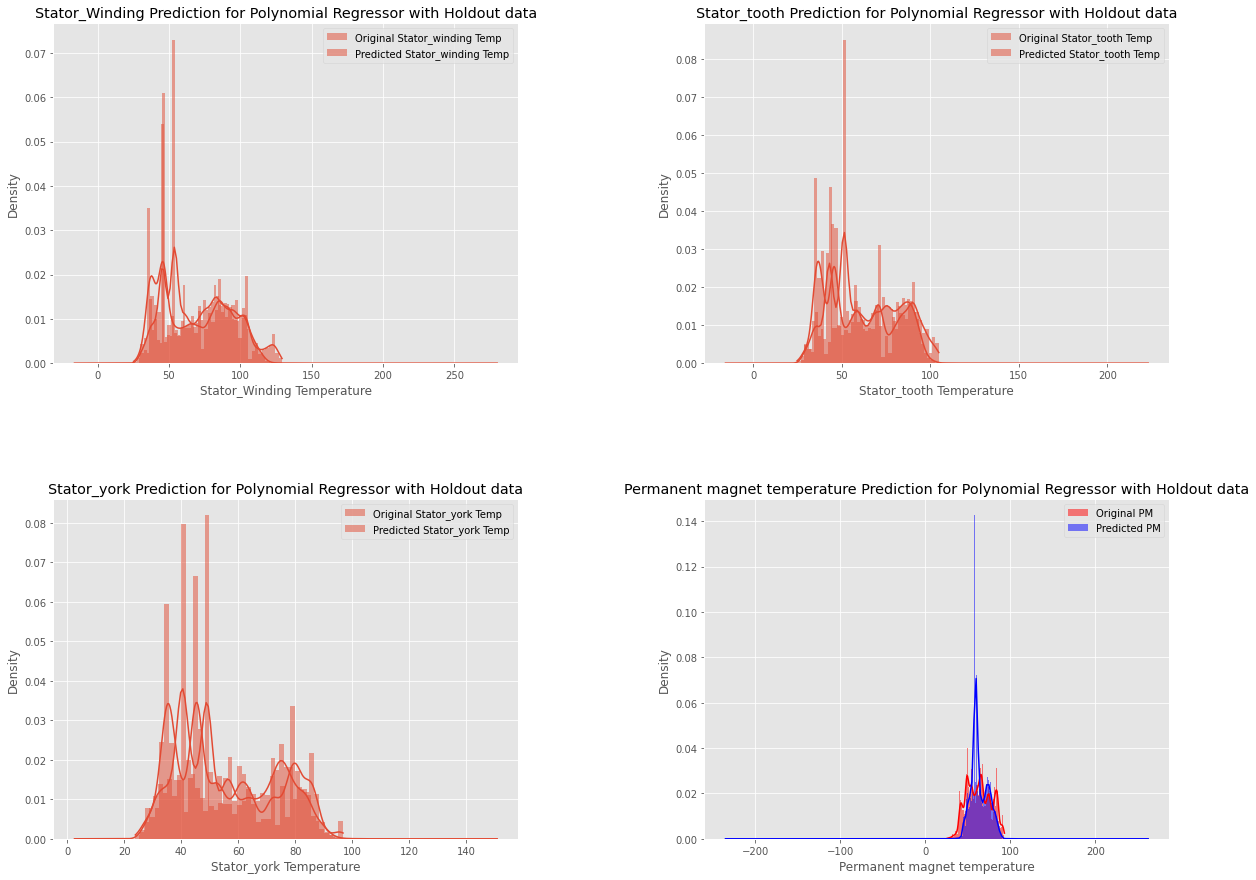

In [ ]:
fig = plt.style.use('ggplot') 
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2 , 1)
sns.histplot(test_Y[:,-4:-3], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_winding Temp',ax=ax)
sns.histplot(test_preds[:,-4:-3], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_winding Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_Winding Prediction for Polynomial Regressor with Holdout data") 
plt.xlabel("Stator_Winding Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 2)
sns.histplot(test_Y[:,-3:-2], color="red", kde=True, stat="density", linewidth=0, label = 'Original Stator_tooth Temp',ax=ax)
sns.histplot(test_preds[:,-3:-2], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Stator_tooth Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_tooth Prediction for Polynomial Regressor with Holdout data") 
plt.xlabel("Stator_tooth Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 3)
sns.histplot(test_Y[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Original Stator_york Temp',ax=ax)
sns.histplot(test_preds[:,-2:-1], kde=True, stat="density", linewidth=0, label = 'Predicted Stator_york Temp',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Stator_york Prediction for Polynomial Regressor with Holdout data") 
plt.xlabel("Stator_york Temperature")
plt.ylabel("Density")


ax = fig.add_subplot(2, 2, 4)
sns.histplot(test_Y[:,-1], color="red", kde=True, stat="density", linewidth=0, label = 'Original PM',ax=ax)
sns.histplot(test_preds[:,-1], color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted PM',ax=ax)
plt.legend(loc = 'upper right') 
plt.title("Permanent magnet temperature Prediction for Polynomial Regressor with Holdout data") 
plt.xlabel("Permanent magnet temperature")
plt.ylabel("Density")
plt.show()

### **Evaluation Table**

In [ ]:
model = pd.DataFrame({
    'Algorithm': ['Linear Regression', 'K-Nearest Neighbours Regressor', 'Ploynomial Regressor'],
    'Training Accuracy' : [linear_train_acc, knn_train_acc, plr_train_acc],
    'Validation Accuracy' : [linear_val_acc, knn_val_acc, plr_val_acc],
    'Testing Accuracy' : [linear_test_acc, knn_test_acc, plr_test_acc]
})

model.sort_values(by = ['Training Accuracy', 'Testing Accuracy', 'Validation Accuracy'], 
                   ascending = True)

,Algorithm,Training Accuracy,Validation Accuracy,Testing Accuracy
0,Linear Regression,73.734935,73.800367,58.620695
2,Ploynomial Regressor,85.129616,85.043850,75.103489
1,K-Nearest Neighbours Regressor,95.489672,94.281040,48.312175


**Result on Holdout Data**

In [ ]:
models = pd.DataFrame({
    'Algorithm': ['Linear Regression', 'K-Nearest Neighbours Regressor', 'Ploynomial Regressor'],
    'RMS Score' : [rms_linear_hold, rms_knn_hold, rms_plr_hold],
    'MAE Score' : [mae_linear_hold, mae_knn_hold, mae_plr_hold],
    'R^2 Score': [ r2_linear_hold, r2_knn_hold, r2_plr_hold]
})

models.sort_values(by = ['RMS Score', 'MAE Score', 'R^2 Score'], 
                   ascending = True)

,Algorithm,RMS Score,MAE Score,R^2 Score
2,Ploynomial Regressor,9.500295,7.052881,75.103489
0,Linear Regression,12.648914,9.904086,58.620695
1,K-Nearest Neighbours Regressor,14.147519,11.558641,48.312175


### **Comaprison Graphs  for Holdout data**

Algorithm vs. R^2 Score

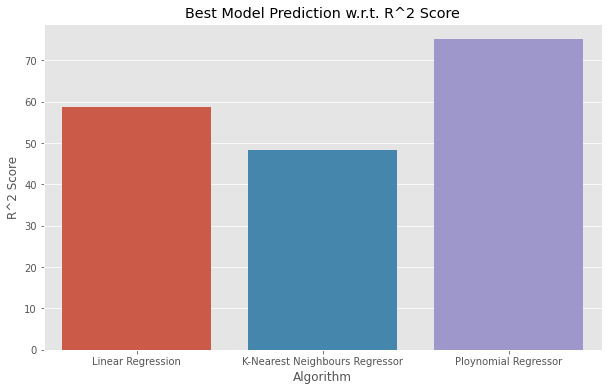

In [ ]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. R^2 Score") 
plt.show()

Algorithm vs. Training Accuracy

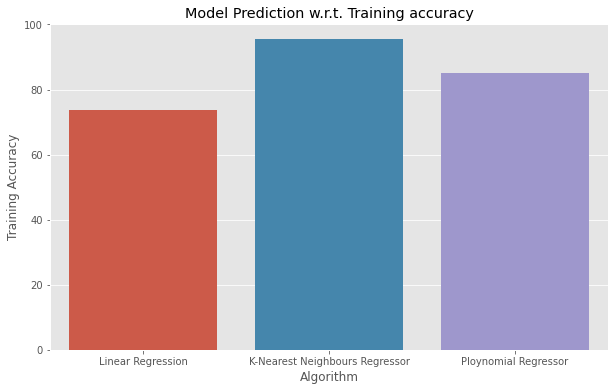

In [ ]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='Training Accuracy',data=model)
plt.title("Model Prediction w.r.t. Training accuracy")
plt.show()

Algorithm vs. Validation Accuracy

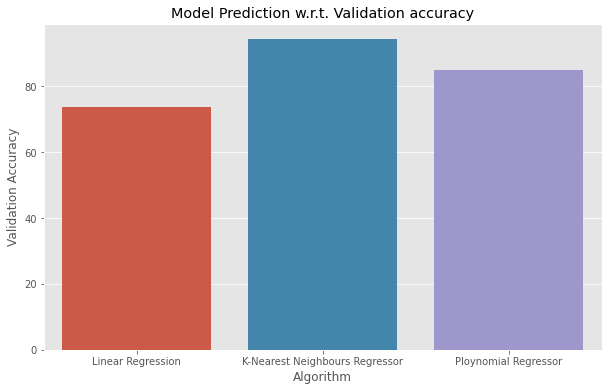

In [ ]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='Validation Accuracy',data=model)
plt.title("Model Prediction w.r.t. Validation accuracy")
plt.show()

Algorithm vs. Testing Accuracy

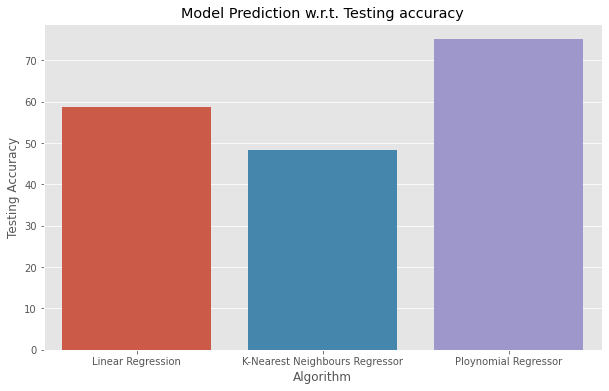

In [ ]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='Testing Accuracy',data=model)
plt.title("Model Prediction w.r.t. Testing accuracy")
plt.show()